In [102]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pdb
#np.random.seed(0)
sns.set()
def f(x):
    return np.sin(x)/100 + x**3

class Remez():
    def __init__(self,n = 2, fun_f = None, x_list_comb = []):
        self.n = n # 多项式次数
        self.fun_f = fun_f # 给定函数
        self.x_list_comb = x_list_comb # 离散点集合
        self.x_list_comb.sort()
        self.f_list_comb = [self.fun_f(x) for x in self.x_list_comb] # 只计算一次全列表数据

        self.fun_g_list = None
        self.epsilon = None
        self.fun_g = None
        self.param_list = None # g参数集合
        self.e = 1e-12 # 收敛参数

        ## 画图
        x = np.arange(min(self.x_list_comb), max(self.x_list_comb), 0.1) # 以0.1为单位，生成从0到6的数据
        y = self.fun_f(x)
        plt.figure(figsize = (17,8))
        plt.plot(x, y, c="red", label="original function")
        self.__random_choice()

    def __random_choice(self):
        self.choice = np.random.choice(len(self.x_list_comb), self.n +2,replace = False)
        self.choice = list(self.choice) # 标记选点
        self.choice.sort() # 排序
        self.x_list = [self.x_list_comb[i] for i in self.choice]
        self.f_list = [self.f_list_comb[i] for i in self.choice]
        return
    
    def __plot_g(self,N):
        x = np.arange(min(self.x_list_comb), max(self.x_list_comb), 0.1)
        y = np.array([float(self.fun_g(i)) for i in x])
        #pdb.set_trace()
        plt.plot(x, y, label = f"g function {N}")

    def __minus(self):
        self.fun_g_list = [float(self.fun_g(x)) for x in self.x_list_comb]
        diff = [np.abs(self.f_list_comb[i] - self.fun_g_list[i]) for i in range(len(self.x_list_comb))]
        #print(self.fun_g_list)
        return diff # 全部点计算

    def __fit(self):
        tmp_M = []
        for i in range(self.n+2):
            param = [(-1)**i] # epsilon 系数
            param.extend([(self.x_list[i])**j for j in range(self.n+1)]) # g系数
            tmp_M.append(param)
        tmp_M = np.matrix(tmp_M)
        #print(tmp_M)
        tmp = np.dot(tmp_M.I,np.matrix(self.f_list).T)
        self.epsilon = tmp[0]
        self.param_list = tmp[1:]
        self.fun_g = (lambda x: np.dot([x**i for i in range(self.n+1)],self.param_list)) # g 多项式函数
        return
    
    def main(self):
        epsilon_last = 10_000
        self.__fit()
        N = 1
        self.__plot_g(N)
        while np.abs(self.epsilon - epsilon_last)>self.e:
            print(f"Iterating {N} times...")
            epsilon_last = self.epsilon
            diff = self.__minus()
            flag = [(1 if i > self.epsilon else 0) for i in diff]
            if sum(flag) == 0 :
                print("Break iteration.")
                break
            else: # 重新选点
                idx = flag.index(1)
                diff_idx = [np.abs(x-idx) for x in self.choice]
                replace_idx = diff_idx.index(min(diff_idx))
                sig_new = np.sign(self.f_list_comb[idx] - self.fun_g(self.x_list_comb[idx]))
                sig_old1 = np.sign(self.f_list_comb[self.choice[replace_idx]]
                                   - self.fun_g(self.x_list_comb[self.choice[replace_idx]]))
                if sig_new*sig_old1 >= 0: # 通过方向决定替换对象
                    self.choice[replace_idx] = idx
                else:
                    if replace_idx+1 <= len(self.x_list_comb):
                        self.choice[replace_idx+1] = idx                       
                    else:
                        self.choice[replace_idx-1] = idx
                
                self.choice.sort() # 排序
                self.x_list = [self.x_list_comb[i] for i in self.choice]
                self.f_list = [self.f_list_comb[i] for i in self.choice]
                self.__fit()
                N += 1
                self.__plot_g(N)
        print("Epsilon converges.")
        plt.scatter(self.x_list_comb, [0]*len(self.x_list_comb), s=25, color = "red", label = "random points")
        for i in range(len(self.x_list)):
            plt.axvline(x = self.x_list[i],linestyle ="--",color = "red")
        plt.legend(loc = "best")
        plt.show()
        return self.param_list


Iterating 1 times...
Iterating 2 times...
Epsilon converges.


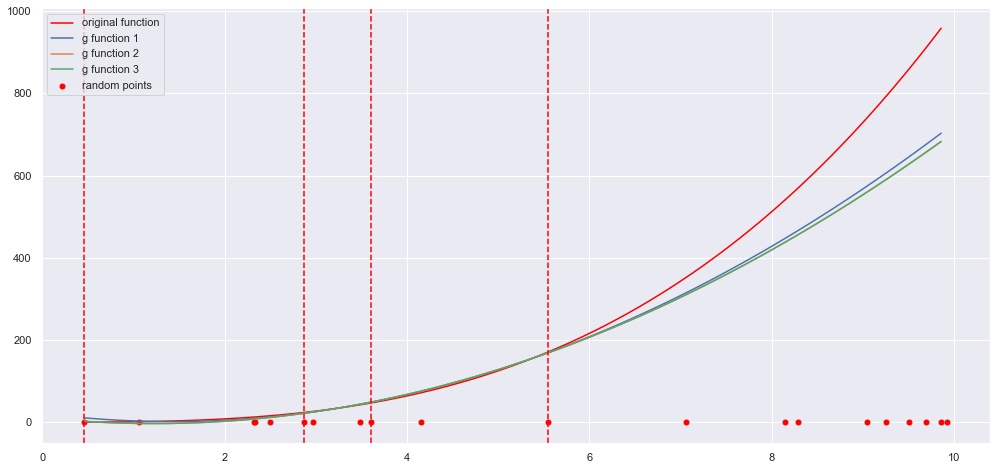

matrix([[ 10.54371043],
        [-22.55699678],
        [  9.20517746]])

In [103]:
a = Remez(n=2,fun_f=f,x_list_comb = np.random.random(20)*10)
a.main()